# Emanuel Naval y Nicolás Velandia
---
# Proyecto 2
## Algoritmo para la detección y conteo de leucocitos

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

from sklearn.metrics import jaccard_score

In [2]:
plt.figure()
# Configuración para los plots debido al Dark Theme de VS Code
plt.rcParams.update({"figure.facecolor": "white"})

<Figure size 640x480 with 0 Axes>

In [3]:
img1 = cv2.imread('image_1.png')
img2 = cv2.imread('image_2.png')
img3 = cv2.imread('image_3.png')


img1_hsv = cv2.cvtColor(img1, cv2.COLOR_BGR2HSV)
img2_hsv = cv2.cvtColor(img2, cv2.COLOR_BGR2HSV)
img3_hsv = cv2.cvtColor(img3, cv2.COLOR_BGR2HSV)

img1_rgb = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
img2_rgb = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)
img3_rgb = cv2.cvtColor(img3, cv2.COLOR_BGR2RGB)

img1_gray = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
img2_gray = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)
img3_gray = cv2.cvtColor(img3, cv2.COLOR_BGR2GRAY)

Analizamos los histogramas de las imágenes filtradas por la componente S del contraste

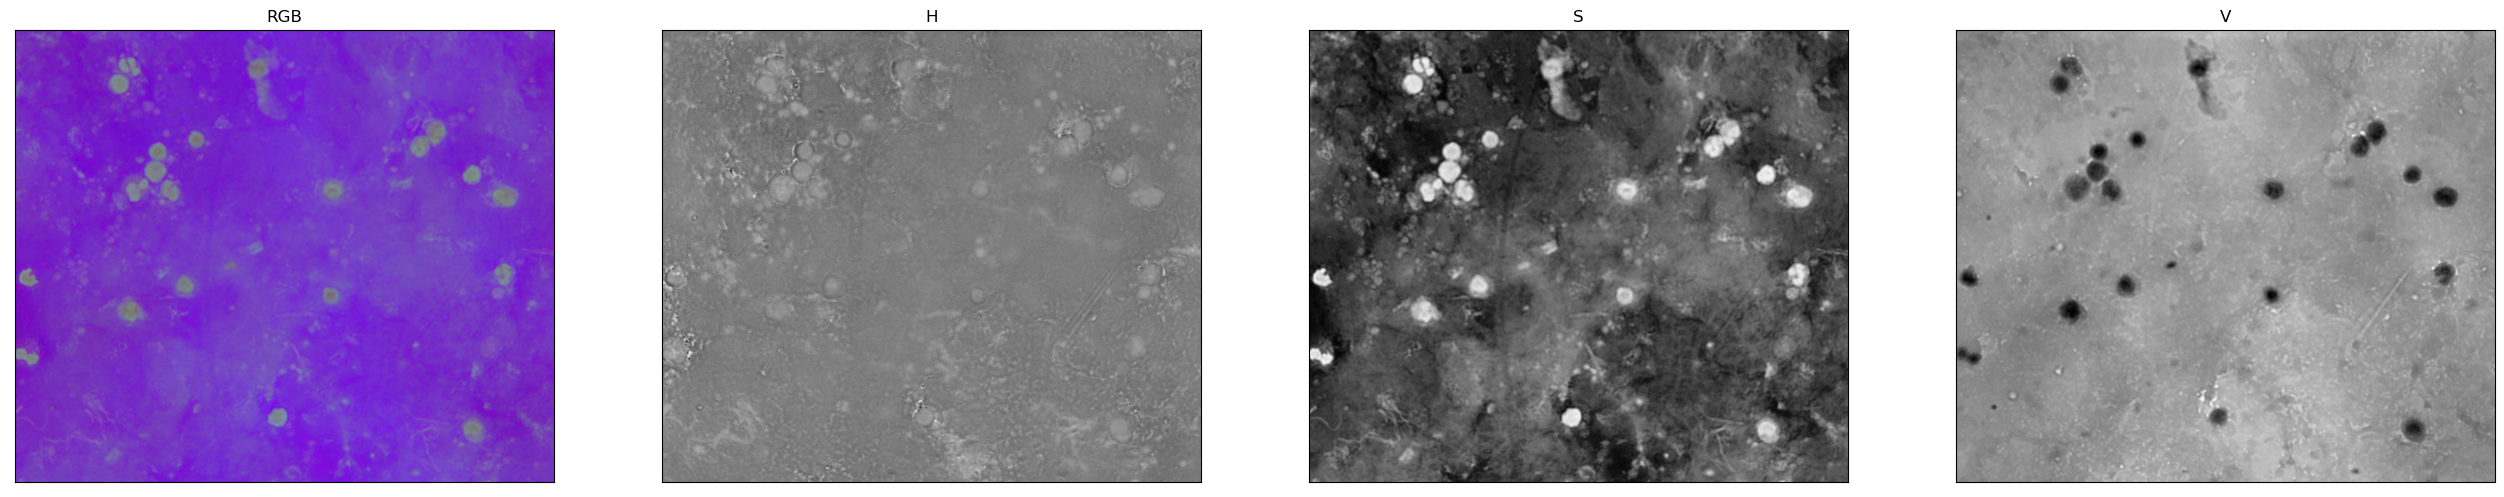

In [4]:
img1_hsv_filt = cv2.GaussianBlur(img1_hsv, (9,9), 60)
img2_hsv_filt = cv2.GaussianBlur(img2_hsv, (9,9), 60)
img3_hsv_filt = cv2.GaussianBlur(img3_hsv, (9,9), 60)

H1, S1, V1 = cv2.split(img1_hsv_filt)
H2, S2, V2 = cv2.split(img2_hsv_filt)
H3, S3, V3 = cv2.split(img3_hsv_filt)


plt.figure(figsize=(32,16))

plt.subplot(141) # Posición 1 de 4
plt.title('RGB')
plt.imshow(img1_hsv_filt)
plt.xticks([]), plt.yticks([]) # Eliminamos ejes

plt.subplot(142) # Posición 2 de 4
plt.title('H')
plt.imshow(H1, cmap = 'gray')
plt.xticks([]), plt.yticks([]) # Eliminamos ejes

plt.subplot(143) # Posición 3 de 4
plt.title('S')
plt.imshow(S1, cmap = 'gray')
plt.xticks([]), plt.yticks([]) # Eliminamos ejes

plt.subplot(144) # Posición 3 de 4
plt.title('V')
plt.imshow(V1, cmap = 'gray')
plt.xticks([]), plt.yticks([]) # Eliminamos ejes

plt.show()

Vemos que las componentes S y V son las que brindan mayor información, vamos a analizarlas.

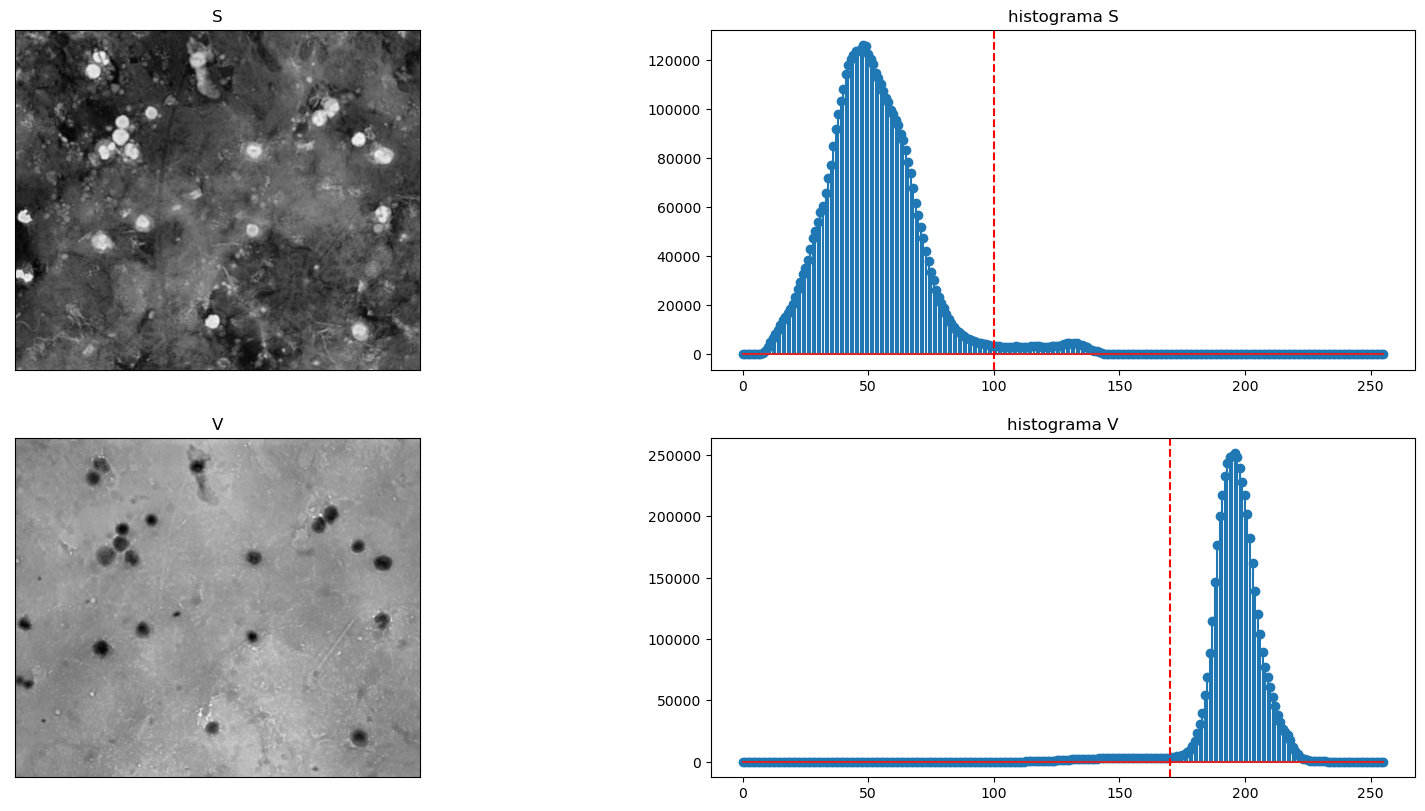

In [5]:
TS = 100
TV = 170

hist_S = cv2.calcHist([S1], [0], None, [256], [00,256])
hist_V = cv2.calcHist([V1], [0], None, [256], [00,256])


plt.figure(figsize=(20,15))
plt.subplot(321)
plt.title('S')
plt.imshow(S1, cmap = 'gray')
plt.xticks([]), plt.yticks([])

plt.subplot(322)
plt.title('histograma S')
plt.stem(hist_S)
plt.axvline(x = TS, color = 'r', label = 'T = 130', linestyle = '--')


plt.subplot(323)
plt.title('V')
plt.imshow(V1, cmap = 'gray')
plt.xticks([]), plt.yticks([])

plt.subplot(324)
plt.title('histograma V')
plt.stem(hist_V)
plt.axvline(x = TV, color = 'r', label = 'T = 130', linestyle = '--')

# plt.subplot(325)
# plt.title('img3')
# plt.imshow(img3_rgb_filt, cmap = 'gray')
# plt.xticks([]), plt.yticks([])

# plt.subplot(326)
# plt.title('histograma img3')
# plt.stem(img3_hist)
# # 165-170
# # 180
# # 160
# plt.axvline(x = T1, color = 'r', label = 'T = 130', linestyle = '--')
plt.show()

Modificamos el contraste de las componentes S y V. A la componente S se incrementa el contraste mientras que a la componente V se le disminuye. Este cambio en el contraste se aplica a los valores que se encuentran por debajo del umbral

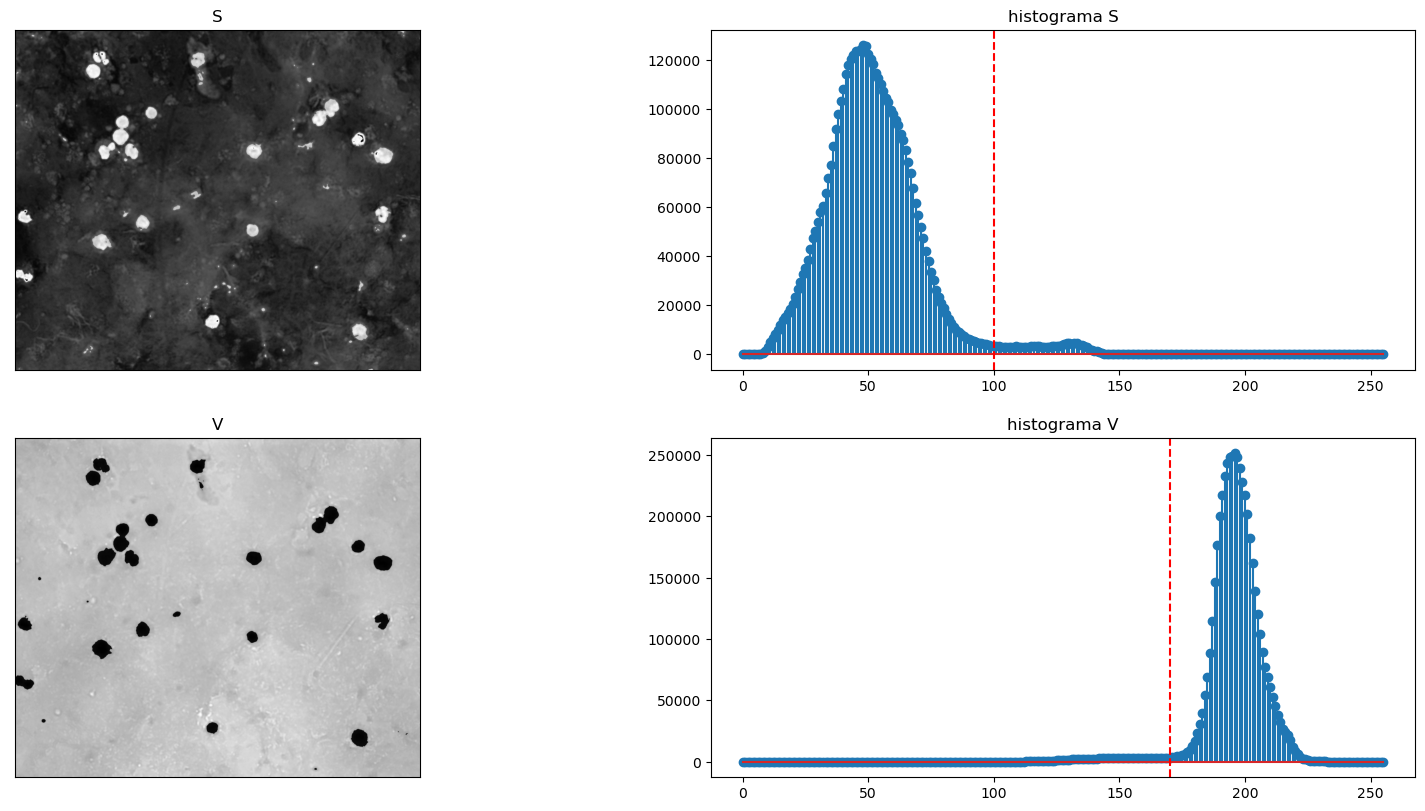

In [6]:
c1 = 1.8
c2 = 0.2
S1[S1 > TS] = np.uint8(S1[S1 > TS] * c1)
V1[V1 < TV] = np.uint8(V1[V1 < TV] * c2)

plt.figure(figsize=(20,15))
plt.subplot(321)
plt.title('S')
plt.imshow(S1, cmap = 'gray')
plt.xticks([]), plt.yticks([])

plt.subplot(322)
plt.title('histograma S')
plt.stem(hist_S)
plt.axvline(x = TS, color = 'r', label = 'T = 130', linestyle = '--')


plt.subplot(323)
plt.title('V')
plt.imshow(V1, cmap = 'gray')
plt.xticks([]), plt.yticks([])

plt.subplot(324)
plt.title('histograma V')
plt.stem(hist_V)
plt.axvline(x = TV, color = 'r', label = 'T = 130', linestyle = '--')

# plt.subplot(325)
# plt.title('img3')
# plt.imshow(img3_rgb_filt, cmap = 'gray')
# plt.xticks([]), plt.yticks([])

# plt.subplot(326)
# plt.title('histograma img3')
# plt.stem(img3_hist)
# # 165-170
# # 180
# # 160
# plt.axvline(x = T1, color = 'r', label = 'T = 130', linestyle = '--')
plt.show()

La componente V nos permite crear la máscara de manera manual y mas directa por lo que trabajaremos con esta componente. Veamos cual es el mejor umbran de la componente V para cada imagen.

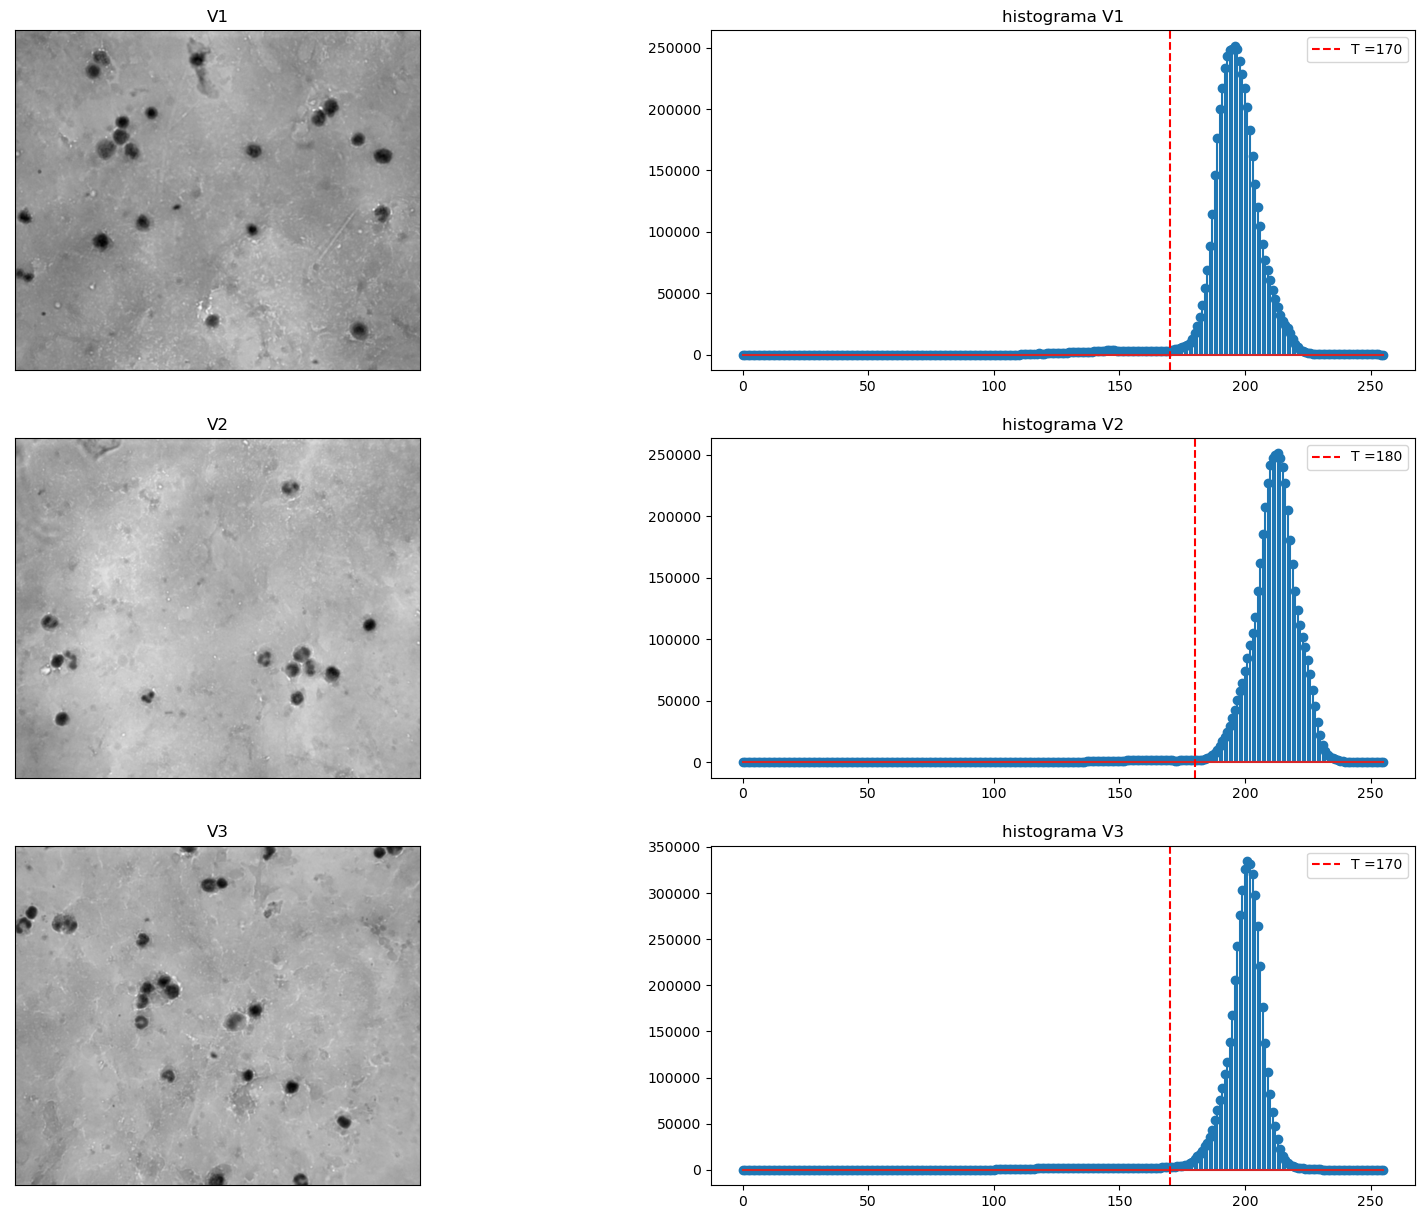

In [7]:
H1, S1, V1 = cv2.split(img1_hsv_filt)
H2, S2, V2 = cv2.split(img2_hsv_filt)
H3, S3, V3 = cv2.split(img3_hsv_filt)

hist_V1 = cv2.calcHist([V1], [0], None, [256], [00,256])
hist_V2 = cv2.calcHist([V2], [0], None, [256], [00,256])
hist_V3 = cv2.calcHist([V3], [0], None, [256], [00,256])

T1 = 170
T2 = 180
T3 = 170

plt.figure(figsize=(20,15))
plt.subplot(321)
plt.title('V1')
plt.imshow(V1, cmap = 'gray')
plt.xticks([]), plt.yticks([])

plt.subplot(322)
plt.title('histograma V1')
plt.stem(hist_V)
plt.axvline(x = T1, color = 'r', label = 'T =' + str(T1), linestyle = '--')
plt.legend()

plt.subplot(323)
plt.title('V2')
plt.imshow(V2, cmap = 'gray')
plt.xticks([]), plt.yticks([])

plt.subplot(324)
plt.title('histograma V2')
plt.stem(hist_V2)
plt.axvline(x = T2, color = 'r', label = 'T =' + str(T2), linestyle = '--')
plt.legend()

plt.subplot(325)
plt.title('V3')
plt.imshow(V3, cmap = 'gray')
plt.xticks([]), plt.yticks([])

plt.subplot(326)
plt.title('histograma V3')
plt.stem(hist_V3)
plt.axvline(x = T3, color = 'r', label = 'T =' + str(T3), linestyle = '--')
plt.legend()

plt.show()

Luego, aumentamos el contraste a cada una para ver el resultado.

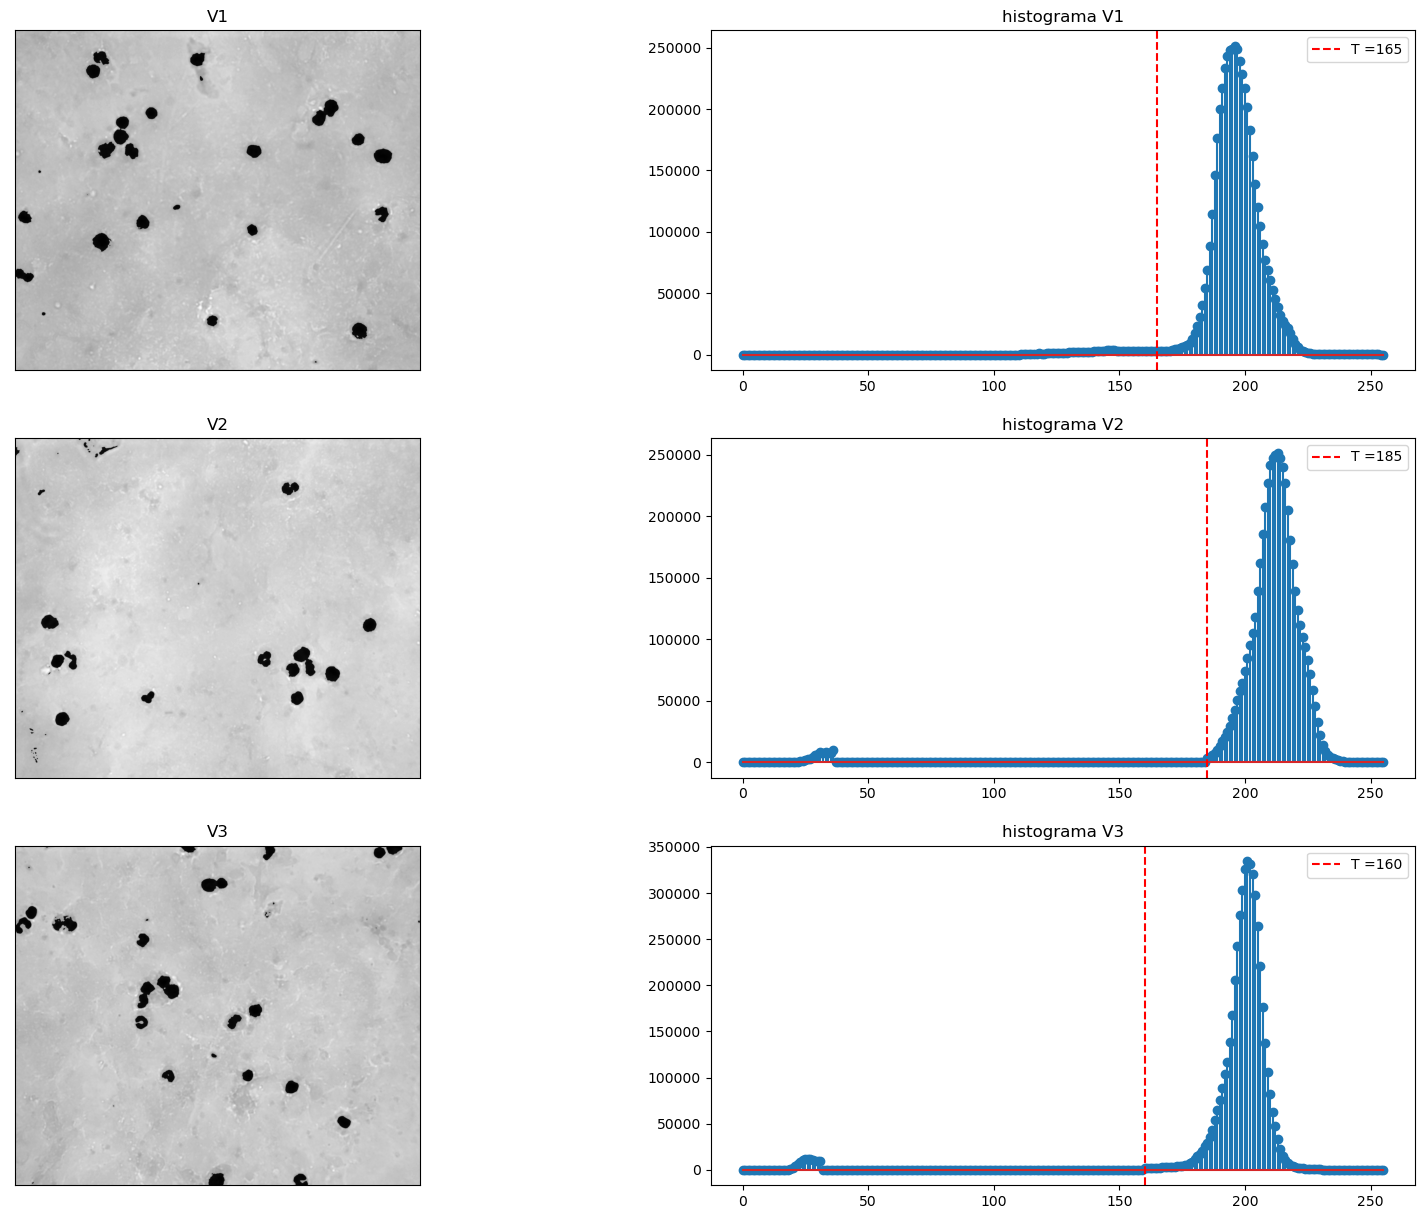

In [8]:
H1, S1, V1 = cv2.split(img1_hsv_filt)
H2, S2, V2 = cv2.split(img2_hsv_filt)
H3, S3, V3 = cv2.split(img3_hsv_filt)

T1 = 165
T2 = 185
T3 = 160

c = 0.2
V1[V1 < T1] = np.uint8(V1[V1 < T1] * c)
V2[V2 < T2] = np.uint8(V2[V2 < T2] * c)
V3[V3 < T3] = np.uint8(V3[V3 < T3] * c)


hist_V1 = cv2.calcHist([V1], [0], None, [256], [00,256])
hist_V2 = cv2.calcHist([V2], [0], None, [256], [00,256])
hist_V3 = cv2.calcHist([V3], [0], None, [256], [00,256])


plt.figure(figsize=(20,15))
plt.subplot(321)
plt.title('V1')
plt.imshow(V1, cmap = 'gray')
plt.xticks([]), plt.yticks([])

plt.subplot(322)
plt.title('histograma V1')
plt.stem(hist_V)
plt.axvline(x = T1, color = 'r', label = 'T =' + str(T1), linestyle = '--')
plt.legend()

plt.subplot(323)
plt.title('V2')
plt.imshow(V2, cmap = 'gray')
plt.xticks([]), plt.yticks([])

plt.subplot(324)
plt.title('histograma V2')
plt.stem(hist_V2)
plt.axvline(x = T2, color = 'r', label = 'T =' + str(T2), linestyle = '--')
plt.legend()

plt.subplot(325)
plt.title('V3')
plt.imshow(V3, cmap = 'gray')
plt.xticks([]), plt.yticks([])

plt.subplot(326)
plt.title('histograma V3')
plt.stem(hist_V3)
plt.axvline(x = T3, color = 'r', label = 'T =' + str(T3), linestyle = '--')
plt.legend()

plt.show()

Luego, dado que los valores de para la umbralización de cada una de las imagenes son $165$, $185$ y $160$ para la imagen 1, 2 y 3 respectivamente, consideramos un umbral general con el promedio de dichos valores. Es decir $\frac{165 + 185 + 160}{3} = 170$. Así se ven los contrastes aumentados para los valores menores al umbral establecido:

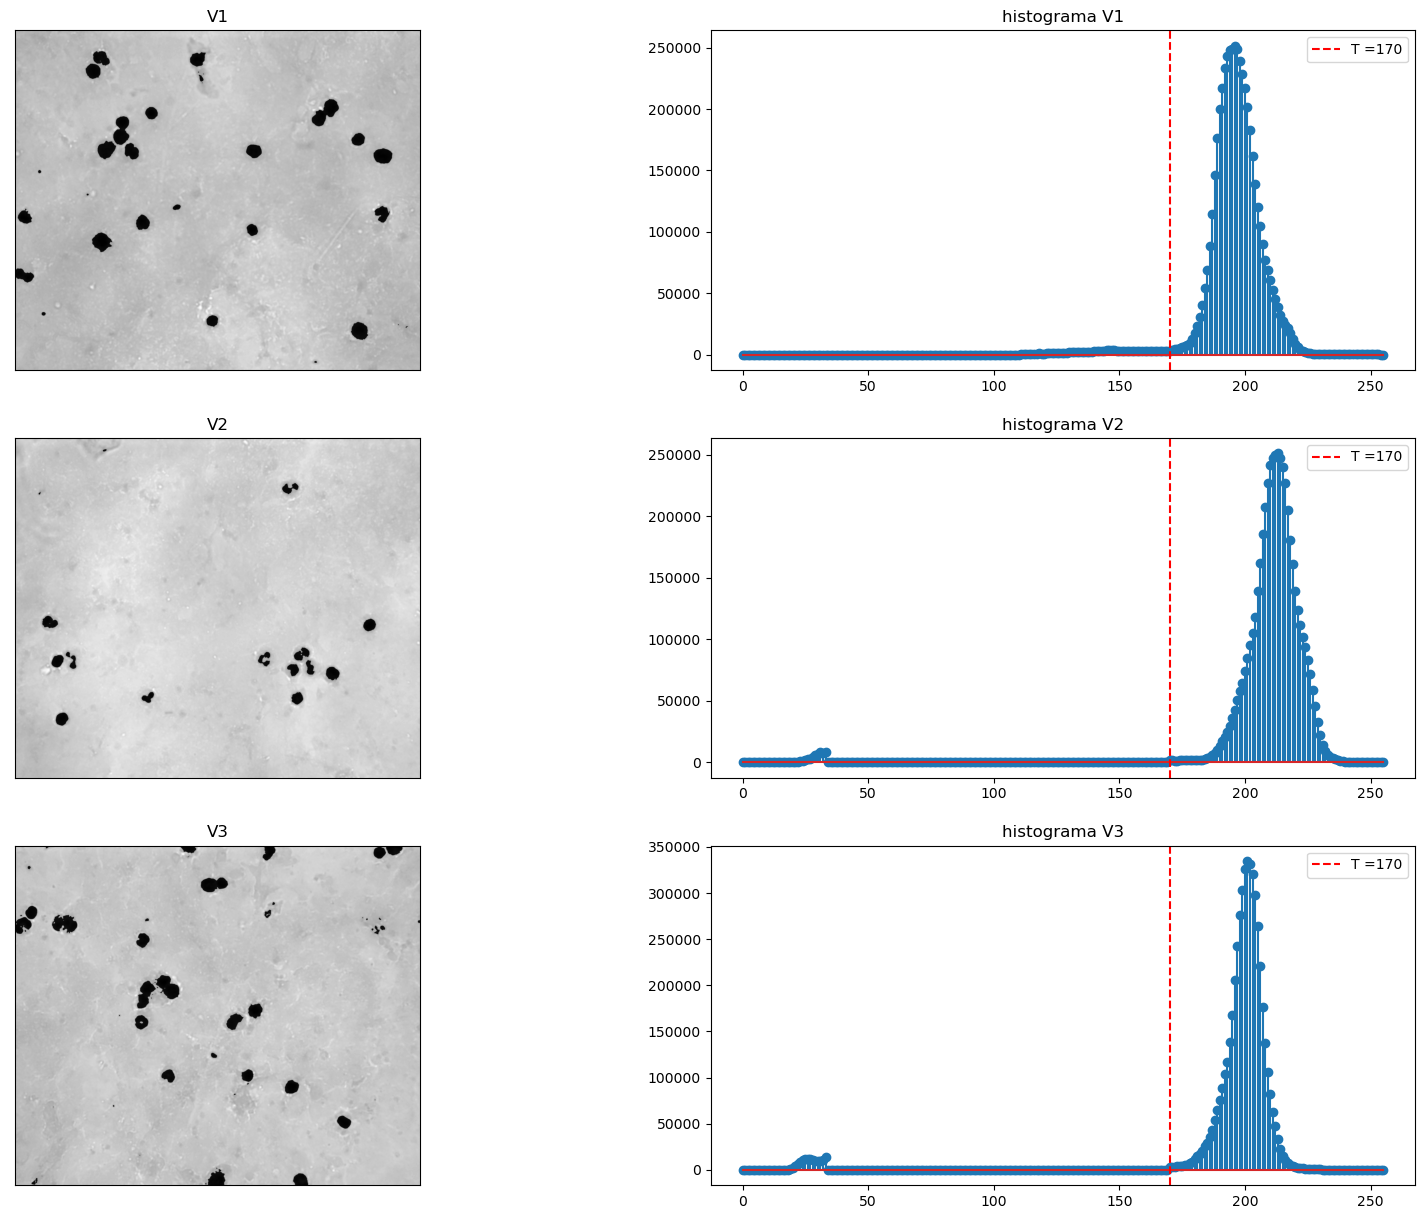

In [9]:
H1, S1, V1 = cv2.split(img1_hsv_filt)
H2, S2, V2 = cv2.split(img2_hsv_filt)
H3, S3, V3 = cv2.split(img3_hsv_filt)

T1, T2, T3 = 170, 170, 170

c = 0.2
V1[V1 < T1] = np.uint8(V1[V1 < T1] * c)
V2[V2 < T2] = np.uint8(V2[V2 < T2] * c)
V3[V3 < T3] = np.uint8(V3[V3 < T3] * c)


hist_V1 = cv2.calcHist([V1], [0], None, [256], [00,256])
hist_V2 = cv2.calcHist([V2], [0], None, [256], [00,256])
hist_V3 = cv2.calcHist([V3], [0], None, [256], [00,256])


plt.figure(figsize=(20,15))
plt.subplot(321)
plt.title('V1')
plt.imshow(V1, cmap = 'gray')
plt.xticks([]), plt.yticks([])

plt.subplot(322)
plt.title('histograma V1')
plt.stem(hist_V)
plt.axvline(x = T1, color = 'r', label = 'T =' + str(T1), linestyle = '--')
plt.legend()

plt.subplot(323)
plt.title('V2')
plt.imshow(V2, cmap = 'gray')
plt.xticks([]), plt.yticks([])

plt.subplot(324)
plt.title('histograma V2')
plt.stem(hist_V2)
plt.axvline(x = T2, color = 'r', label = 'T =' + str(T2), linestyle = '--')
plt.legend()

plt.subplot(325)
plt.title('V3')
plt.imshow(V3, cmap = 'gray')
plt.xticks([]), plt.yticks([])

plt.subplot(326)
plt.title('histograma V3')
plt.stem(hist_V3)
plt.axvline(x = T3, color = 'r', label = 'T =' + str(T3), linestyle = '--')
plt.legend()

plt.show()

Ahora veamos como es la umbralización OTSU con este cambio.

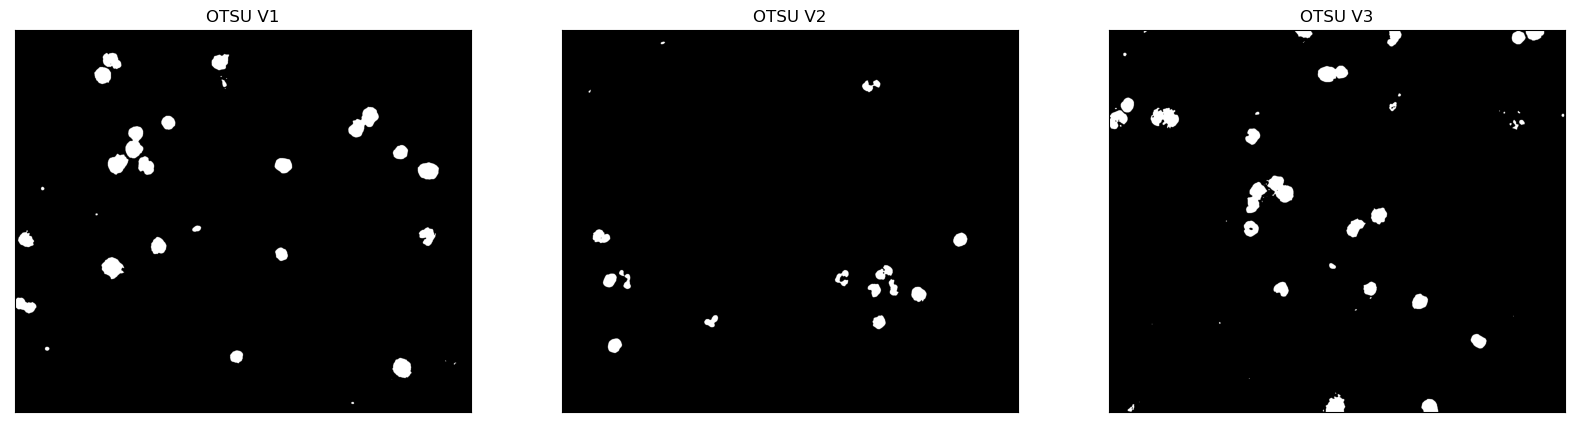

In [10]:
[T1_opt, OTSU1] = cv2.threshold(V1, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)
[T2_opt, OTSU2] = cv2.threshold(V2, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)
[T3_opt, OTSU3] = cv2.threshold(V3, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

plt.figure(figsize=(20,10))

plt.subplot(131)
plt.title('OTSU V1')
plt.imshow(OTSU1, cmap = 'gray')
plt.xticks([]), plt.yticks([])

plt.subplot(132)
plt.title('OTSU V2')
plt.imshow(OTSU2, cmap = 'gray')
plt.xticks([]), plt.yticks([])
plt.subplot(133)

plt.title('OTSU V3')
plt.imshow(OTSU3, cmap = 'gray')
plt.xticks([]), plt.yticks([])
plt.show()

Como era de esperarse hay un poco de ruido en las imagenes. La imagen 1 y la 3 cuentan con ruido grande y en gran cantidad en comparación al ruido presente en la imagen 2. Vamos a quitar dicho ruido con apertura.

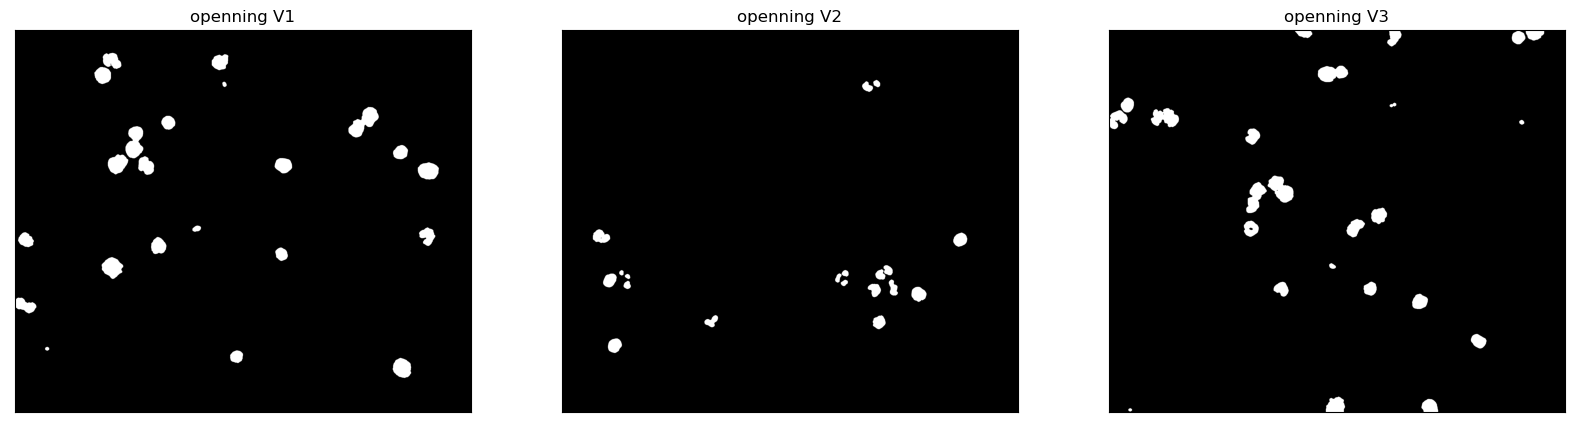

In [11]:
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (7,7))
openning1 = cv2.morphologyEx(OTSU1, cv2.MORPH_OPEN, kernel, iterations=3)
openning2 = cv2.morphologyEx(OTSU2, cv2.MORPH_OPEN, kernel, iterations=3)
openning3 = cv2.morphologyEx(OTSU3, cv2.MORPH_OPEN, kernel, iterations=3)

plt.figure(figsize=(20,10))

plt.subplot(131)
plt.title('openning V1')
plt.imshow(openning1, cmap = 'gray')
plt.xticks([]), plt.yticks([])

plt.subplot(132)
plt.title('openning V2')
plt.imshow(openning2, cmap = 'gray')
plt.xticks([]), plt.yticks([])
plt.subplot(133)

plt.title('openning V3')
plt.imshow(openning3, cmap = 'gray')
plt.xticks([]), plt.yticks([])
plt.show()

Aunque queda un poco de ruido, desaparecerá con la erosion a continuación.

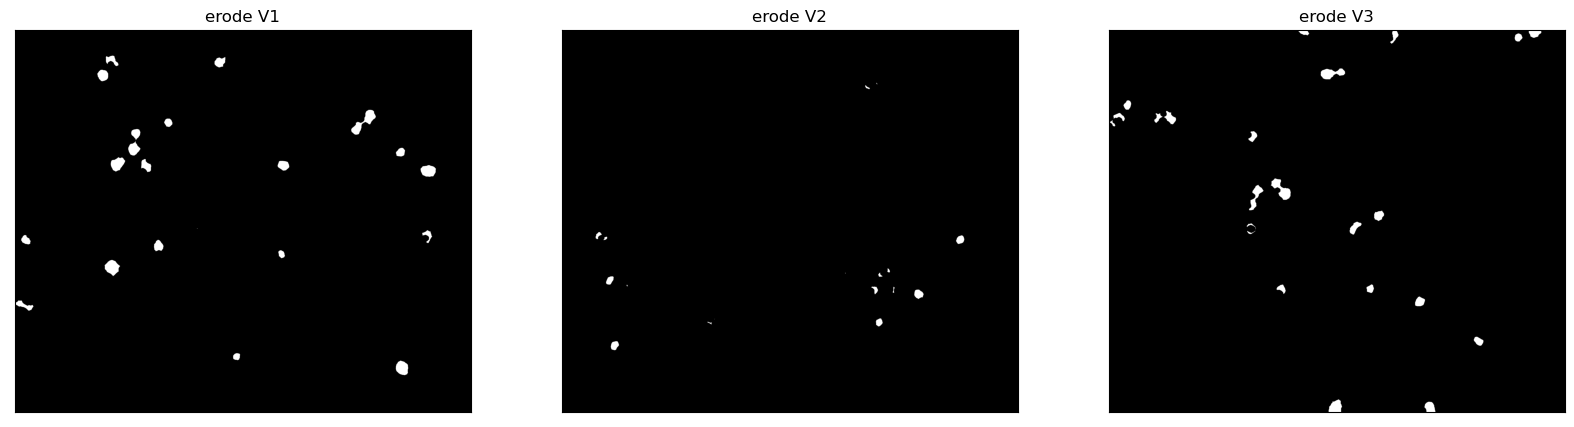

In [12]:
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (7,7))

erode1 = cv2.erode(openning1, kernel, iterations=5)
erode2 = cv2.erode(openning2, kernel, iterations=5)
erode3 = cv2.erode(openning3, kernel, iterations=5)

plt.figure(figsize=(20,10))

plt.subplot(131)
plt.title('erode V1')
plt.imshow(erode1, cmap = 'gray')
plt.xticks([]), plt.yticks([])

plt.subplot(132)
plt.title('erode V2')
plt.imshow(erode2, cmap = 'gray')
plt.xticks([]), plt.yticks([])

plt.subplot(133)
plt.title('erode V3')
plt.imshow(erode3, cmap = 'gray')
plt.xticks([]), plt.yticks([])
plt.show()

Como hay aun objetos unidos, realizamos otra apertura con un kernel mas pequeño.

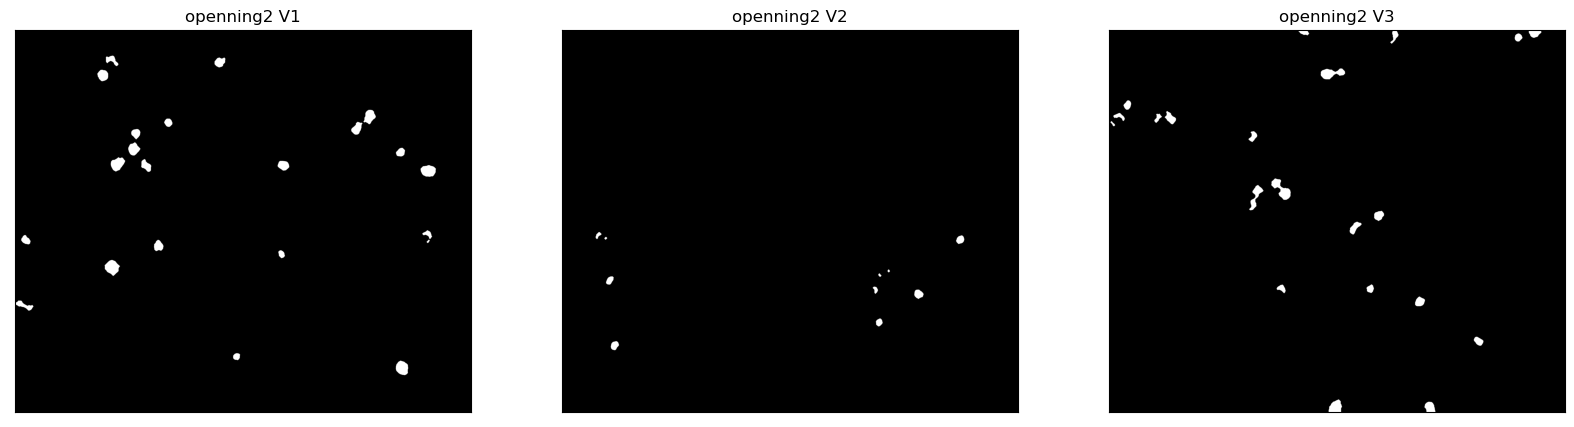

In [13]:
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (3,3))
openning21 = cv2.morphologyEx(erode1, cv2.MORPH_OPEN, kernel, iterations=5)
openning22 = cv2.morphologyEx(erode2, cv2.MORPH_OPEN, kernel, iterations=5)
openning23 = cv2.morphologyEx(erode3, cv2.MORPH_OPEN, kernel, iterations=5)

plt.figure(figsize=(20,10))

plt.subplot(131)
plt.title('openning2 V1')
plt.imshow(openning21, cmap = 'gray')
plt.xticks([]), plt.yticks([])

plt.subplot(132)
plt.title('openning2 V2')
plt.imshow(openning22, cmap = 'gray')
plt.xticks([]), plt.yticks([])
plt.subplot(133)

plt.title('openning2 V3')
plt.imshow(openning23, cmap = 'gray')
plt.xticks([]), plt.yticks([])
plt.show()

Luego realizamos dilatación con clausura.

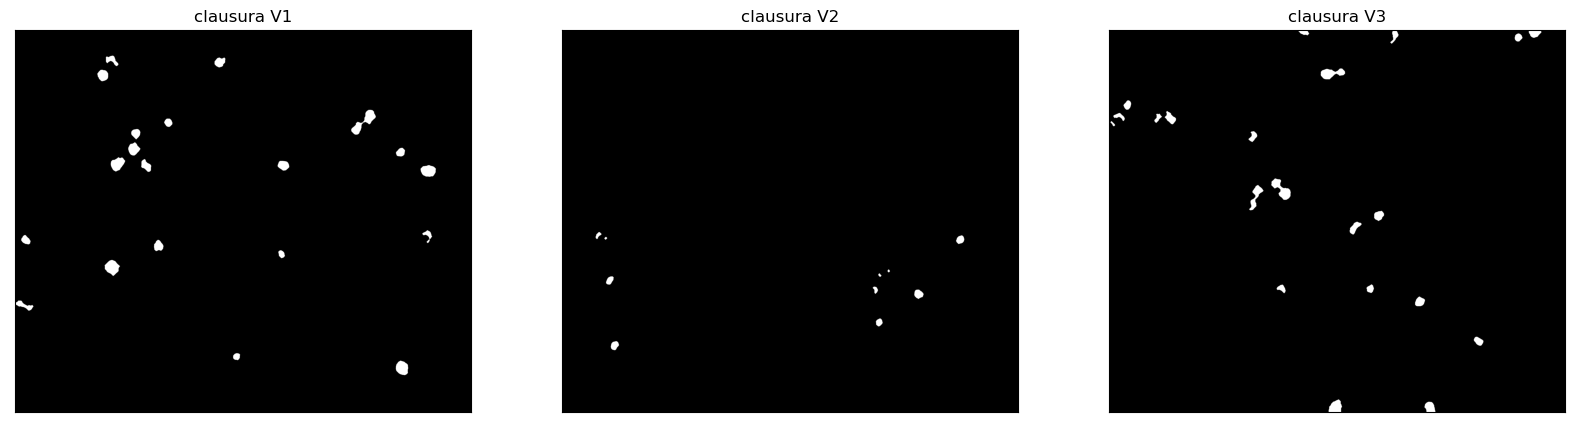

In [14]:
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (3,3))
clausura1 = cv2.morphologyEx(openning21, cv2.MORPH_CLOSE, kernel, iterations=8)
clausura2 = cv2.morphologyEx(openning22, cv2.MORPH_CLOSE, kernel, iterations=8)
clausura3 = cv2.morphologyEx(openning23, cv2.MORPH_CLOSE, kernel, iterations=8)

plt.figure(figsize=(20,10))

plt.subplot(131)
plt.title('clausura V1')
plt.imshow(clausura1, cmap = 'gray')
plt.xticks([]), plt.yticks([])

plt.subplot(132)
plt.title('clausura V2')
plt.imshow(clausura2, cmap = 'gray')
plt.xticks([]), plt.yticks([])
plt.subplot(133)

plt.title('clausura V3')
plt.imshow(clausura3, cmap = 'gray')
plt.xticks([]), plt.yticks([])
plt.show()

Una dilatación adicional

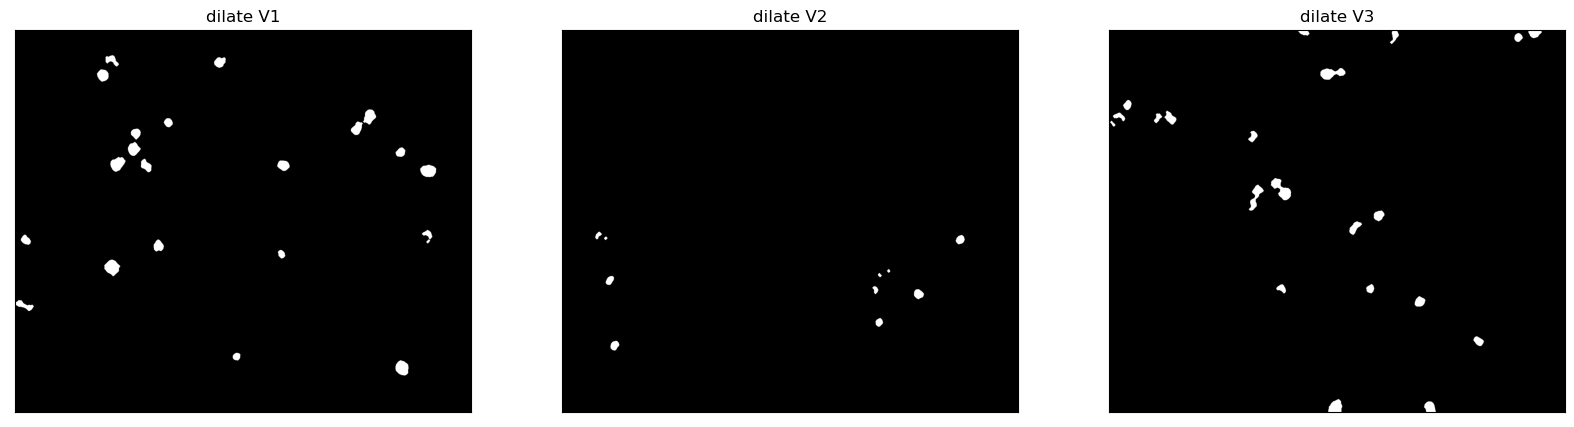

In [15]:
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (3,3))
dilate1 = cv2.dilate(openning21, kernel, iterations=2)
dilate2 = cv2.dilate(openning22, kernel, iterations=2)
dilate3 = cv2.dilate(openning23, kernel, iterations=2)

plt.figure(figsize=(20,10))

plt.subplot(131)
plt.title('dilate V1')
plt.imshow(dilate1, cmap = 'gray')
plt.xticks([]), plt.yticks([])

plt.subplot(132)
plt.title('dilate V2')
plt.imshow(dilate2, cmap = 'gray')
plt.xticks([]), plt.yticks([])
plt.subplot(133)

plt.title('dilate V3')
plt.imshow(dilate3, cmap = 'gray')
plt.xticks([]), plt.yticks([])
plt.show()

Contamos los objetos en cada mascara.

Cantidad de objetos imagen1:  22
Cantidad de objetos imagen2:  10
Cantidad de objetos imagen3:  21


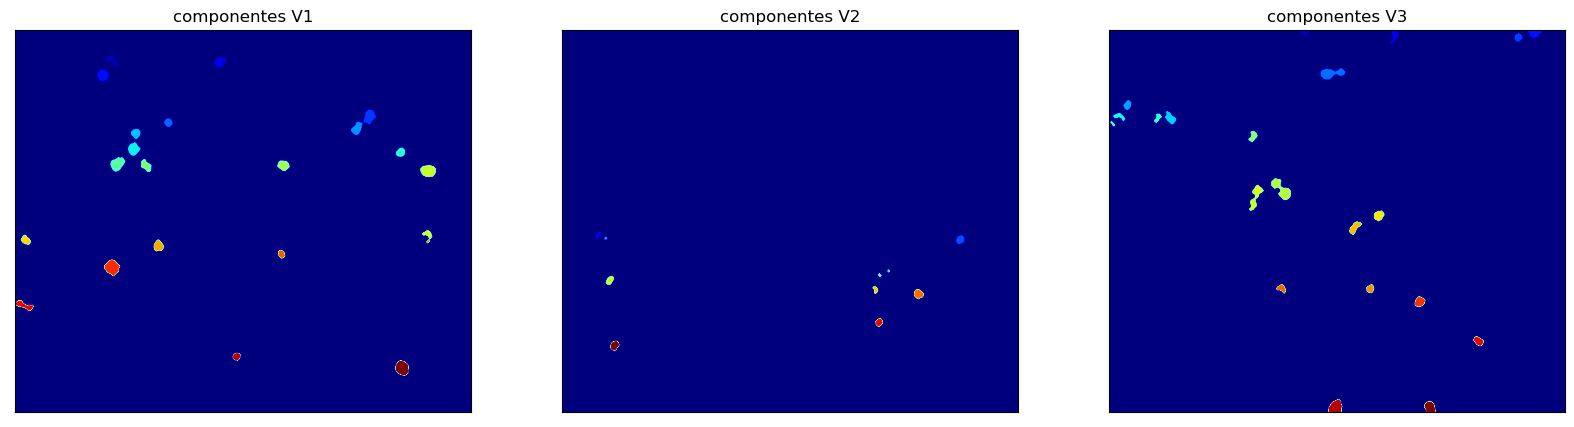

In [16]:
[cnt1, markers1] = cv2.connectedComponents(dilate1)
[cnt2, markers2] = cv2.connectedComponents(dilate2)
[cnt3, markers3] = cv2.connectedComponents(dilate3)

print('Cantidad de objetos imagen1: ', cnt1-1)
print('Cantidad de objetos imagen2: ', cnt2-1)
print('Cantidad de objetos imagen3: ', cnt3-1)

plt.figure(figsize=(20,10))

plt.subplot(131)
plt.title('componentes V1')
plt.imshow(markers1, cmap = 'jet')
plt.xticks([]), plt.yticks([])

plt.subplot(132)
plt.title('componentes V2')
plt.imshow(markers2, cmap = 'jet')
plt.xticks([]), plt.yticks([])
plt.subplot(133)

plt.title('componentes V3')
plt.imshow(markers3, cmap = 'jet')
plt.xticks([]), plt.yticks([])
plt.show()

Obtenemos regiones compartidas

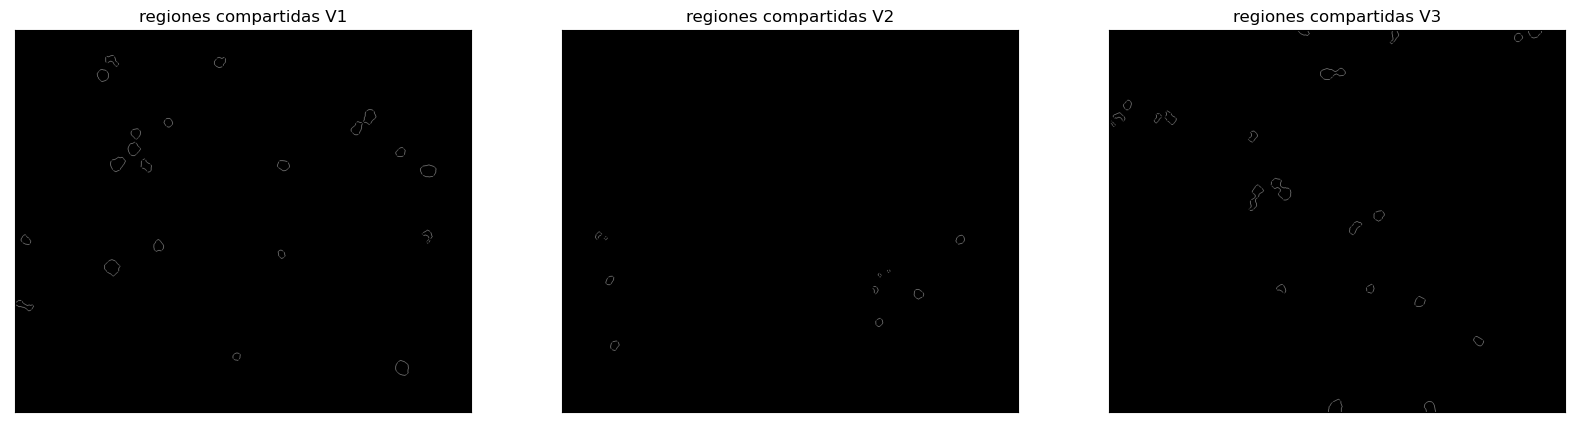

In [17]:
# Detectar la regiones compartidas
unknown1 = cv2.subtract(dilate1, erode1)
unknown2 = cv2.subtract(dilate2, erode2)
unknown3 = cv2.subtract(dilate3, erode3)

plt.figure(figsize=(20,10))

plt.subplot(131)
plt.title('regiones compartidas V1')
plt.imshow(unknown1, cmap = 'gray')
plt.xticks([]), plt.yticks([])

plt.subplot(132)
plt.title('regiones compartidas V2')
plt.imshow(unknown2, cmap = 'gray')
plt.xticks([]), plt.yticks([])
plt.subplot(133)

plt.title('regiones compartidas V3')
plt.imshow(unknown3, cmap = 'gray')
plt.xticks([]), plt.yticks([])
plt.show()

Agregamos las regiones compartidas

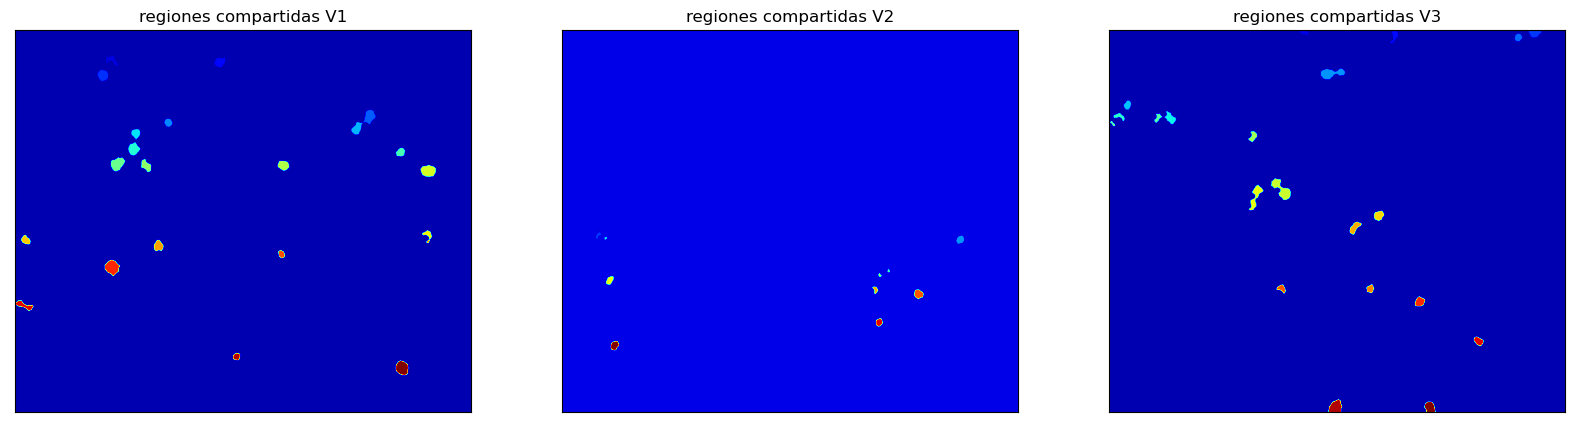

In [18]:
markers1 = markers1 + 1 
markers1[unknown1==255] = 0 

markers2 = markers2 + 1 
markers2[unknown2==255] = 0 

markers3 = markers3 + 1 
markers3[unknown3==255] = 0 

plt.figure(figsize=(20,10))

plt.subplot(131)
plt.title('regiones compartidas V1')
plt.imshow(markers1, cmap = 'jet')
plt.xticks([]), plt.yticks([])

plt.subplot(132)
plt.title('regiones compartidas V2')
plt.imshow(markers2, cmap = 'jet')
plt.xticks([]), plt.yticks([])
plt.subplot(133)

plt.title('regiones compartidas V3')
plt.imshow(markers3, cmap = 'jet')
plt.xticks([]), plt.yticks([])
plt.show()

Segmentación Watershed

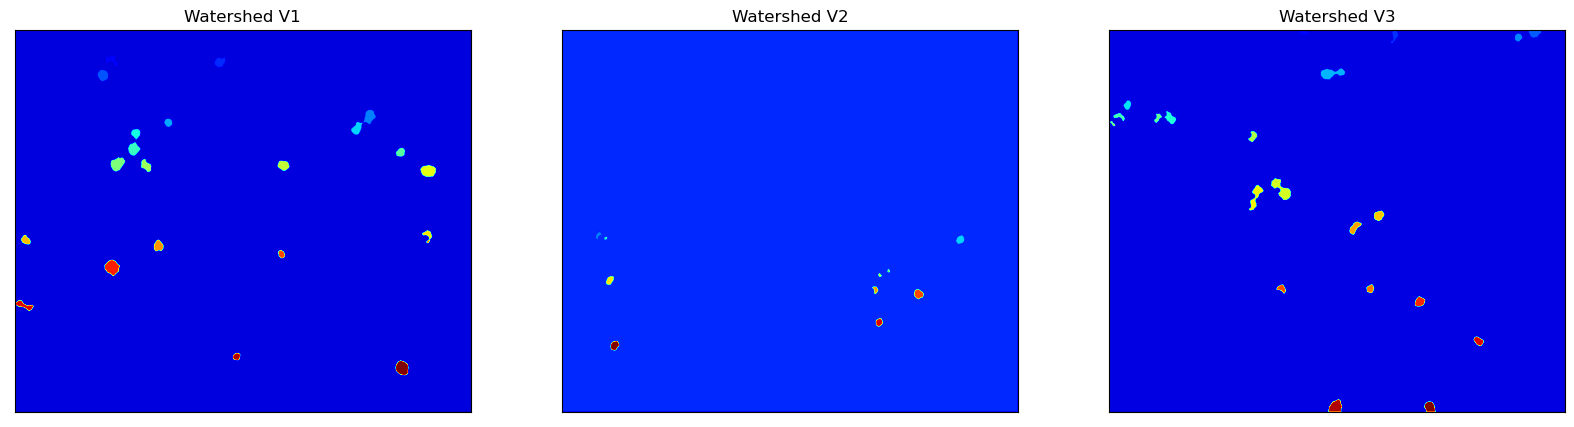

In [19]:
watershed1 = cv2.watershed(img1_rgb, markers1)
watershed1 = watershed1 - 1

watershed2 = cv2.watershed(img2_rgb, markers2)
watershed2 = watershed2 - 1

watershed3 = cv2.watershed(img3_rgb, markers3)
watershed3 = watershed3 - 1

plt.figure(figsize=(20,10))

plt.subplot(131)
plt.title('Watershed V1')
plt.imshow(watershed1, cmap = 'jet')
plt.xticks([]), plt.yticks([])

plt.subplot(132)
plt.title('Watershed V2')
plt.imshow(watershed2, cmap = 'jet')
plt.xticks([]), plt.yticks([])
plt.subplot(133)

plt.title('Watershed V3')
plt.imshow(watershed3, cmap = 'jet')
plt.xticks([]), plt.yticks([])
plt.show()

Posterior a esto, comprimimos este proceso en una función que guardamos en el archivo llamado Leuco.py.

Esta función tiene un parametro que permite decidir si se realiza o no el paso en que se aplica erosión a la mascara.

Ahora usamos esta función y obtenemos las mascaras y el numero de leucocitos en cada imagen

In [30]:
import Leuco
print("---------- Con erosión ---------\n")
print("----------IMAGEN 1-------------")
mask21, count1 = Leuco.Leucos(img1, do_erode=1)
print(f"numero de leucocitos = {count1}")

print("----------IMAGEN 2-------------")
mask22, count2 = Leuco.Leucos(img2, do_erode=1)
print(f"numero de leucocitos = {count2}")

print("----------IMAGEN 3-------------")
mask23, count3 = Leuco.Leucos(img3, do_erode=1)
print(f"numero de leucocitos = {count3}")


print("\n---------- Sin erosión ---------\n")
print("----------IMAGEN 1-------------")
mask31, count21 = Leuco.Leucos(img1)
print(f"numero de leucocitos = {count21}")

print("----------IMAGEN 2-------------")
mask32, count22 = Leuco.Leucos(img2)
print(f"numero de leucocitos = {count22}")

print("----------IMAGEN 3-------------")
mask33, count23 = Leuco.Leucos(img3)
print(f"numero de leucocitos = {count23}")

---------- Con erosión ---------

----------IMAGEN 1-------------
numero de leucocitos = 21
----------IMAGEN 2-------------
numero de leucocitos = 5
----------IMAGEN 3-------------
numero de leucocitos = 21

---------- Sin erosión ---------

----------IMAGEN 1-------------
numero de leucocitos = 19
----------IMAGEN 2-------------
numero de leucocitos = 13
----------IMAGEN 3-------------
numero de leucocitos = 21


---

Conteo de los objetos con las mascaras dadas:

In [21]:
mask1 = cv2.imread('image_1_mask.png')
mask2 = cv2.imread('image_2_mask.png')
mask3 = cv2.imread('image_3_mask.png')

mask1 = cv2.cvtColor(mask1, cv2.COLOR_BGR2GRAY)
mask2 = cv2.cvtColor(mask2, cv2.COLOR_BGR2GRAY)
mask3 = cv2.cvtColor(mask3, cv2.COLOR_BGR2GRAY)

Cantidad de objetos imagen1:  21
Cantidad de objetos imagen2:  14
Cantidad de objetos imagen3:  34


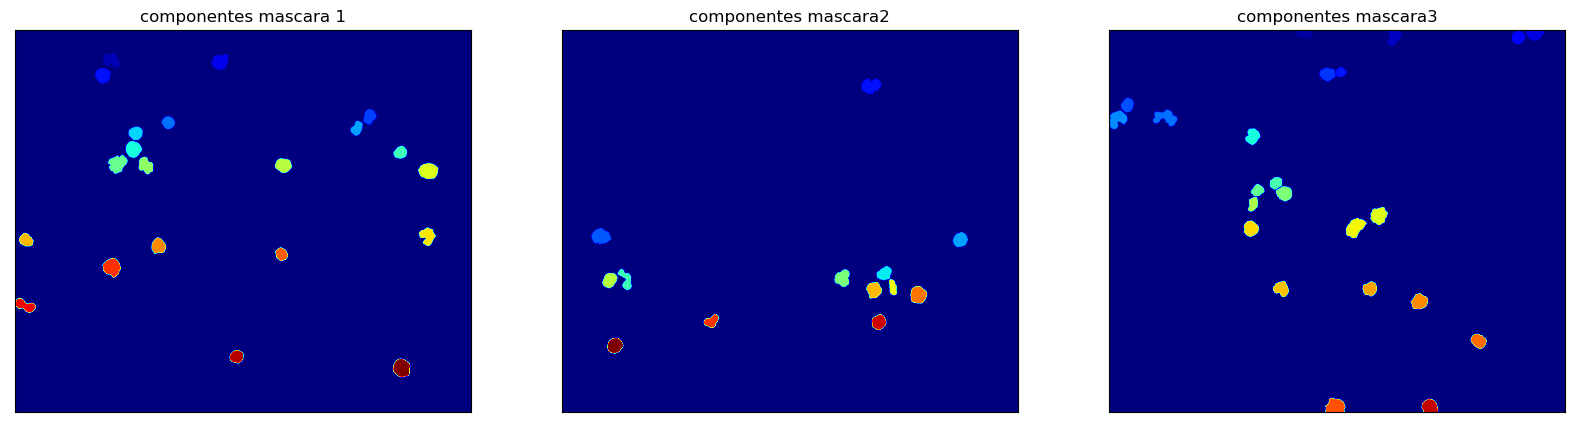

In [22]:
[cnt21, markers21] = cv2.connectedComponents(mask1)
[cnt22, markers22] = cv2.connectedComponents(mask2)
[cnt23, markers23] = cv2.connectedComponents(mask3)

print('Cantidad de objetos imagen1: ', cnt21-1)
print('Cantidad de objetos imagen2: ', cnt22-1)
print('Cantidad de objetos imagen3: ', cnt23-1)

plt.figure(figsize=(20,10))

plt.subplot(131)
plt.title('componentes mascara 1')
plt.imshow(markers21, cmap = 'jet')
plt.xticks([]), plt.yticks([])

plt.subplot(132)
plt.title('componentes mascara2')
plt.imshow(markers22, cmap = 'jet')
plt.xticks([]), plt.yticks([])
plt.subplot(133)

plt.title('componentes mascara3')
plt.imshow(markers23, cmap = 'jet')
plt.xticks([]), plt.yticks([])
plt.show()

---

Ahora vamos a evaluar la detección de nuestro algoritmo con erosión usando el indice de Jaccard

----------------IMAGEN1-------------


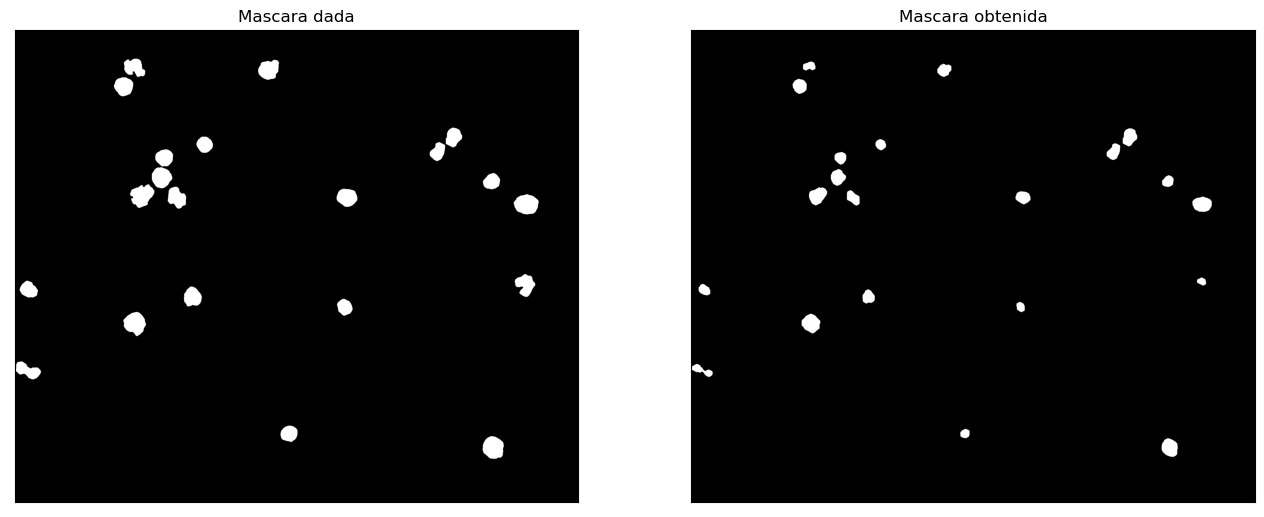

Indice de Jaccard imagen 1: 51.26469540434627%
----------------IMAGEN2-------------


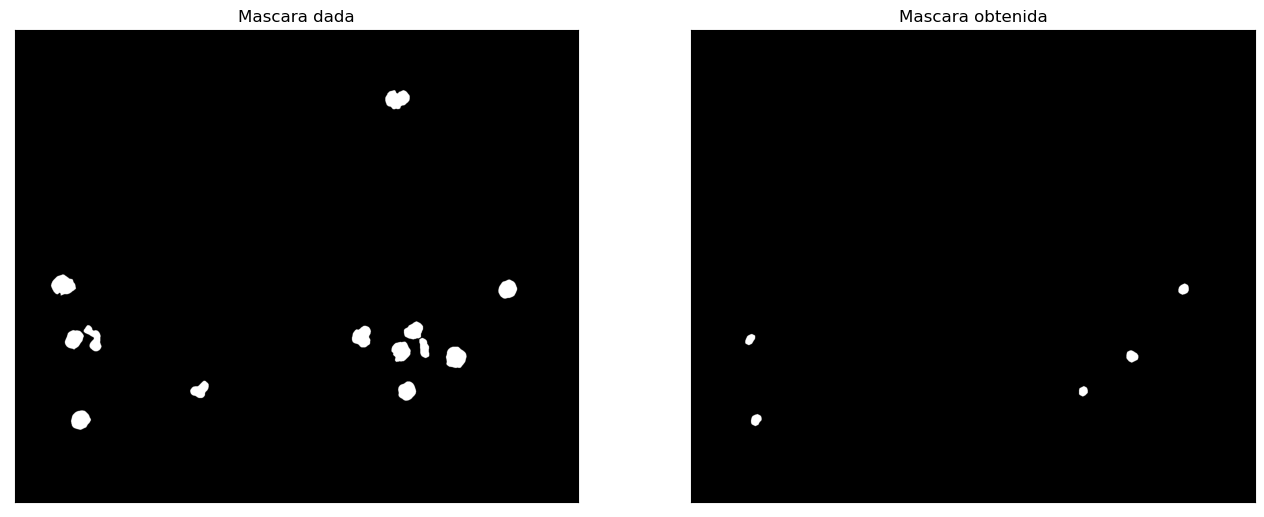

Indice de Jaccard imagen 2: 12.290277839917676%
----------------IMAGEN3-------------


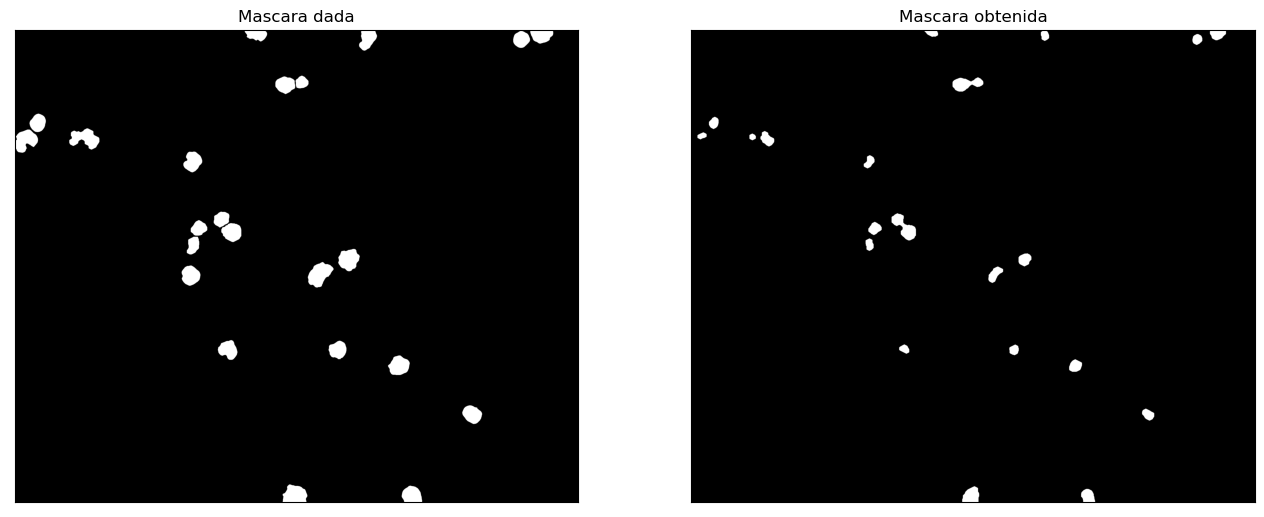

Indice de Jaccard imagen 3: 41.15464632454924%


In [32]:
_, mask1 = cv2.threshold(mask1, 0, 1, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
_, mask21 = cv2.threshold(mask21, 0, 1, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

_, mask2 = cv2.threshold(mask2, 0, 1, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
_, mask22 = cv2.threshold(mask22, 0, 1, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

_, mask3 = cv2.threshold(mask3, 0, 1, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
_, mask23 = cv2.threshold(mask23, 0, 1, cv2.THRESH_BINARY + cv2.THRESH_OTSU)


print("----------------IMAGEN1-------------")
plt.figure(figsize=(16,8))
plt.subplot(121)
plt.imshow(mask1,  cmap = 'gray')
plt.title('Mascara dada')
plt.xticks([]), plt.yticks([])

plt.subplot(122)
plt.imshow(mask21, cmap='gray')
plt.title('Mascara obtenida')
plt.xticks([]), plt.yticks([])
plt.show()

J1 = jaccard_score(mask1,mask21, average="micro")
print(f'Indice de Jaccard imagen 1: {J1*100}%')

print("----------------IMAGEN2-------------")
plt.figure(figsize=(16,8))
plt.subplot(121)
plt.imshow(mask2,  cmap = 'gray')
plt.title('Mascara dada')
plt.xticks([]), plt.yticks([])

plt.subplot(122)
plt.imshow(mask22, cmap='gray')
plt.title('Mascara obtenida')
plt.xticks([]), plt.yticks([])
plt.show()

J2 = jaccard_score(mask2,mask22, average="micro")
print(f'Indice de Jaccard imagen 2: {J2*100}%')

print("----------------IMAGEN3-------------")
plt.figure(figsize=(16,8))
plt.subplot(121)
plt.imshow(mask3,  cmap = 'gray')
plt.title('Mascara dada')
plt.xticks([]), plt.yticks([])

plt.subplot(122)
plt.imshow(mask23, cmap='gray')
plt.title('Mascara obtenida')
plt.xticks([]), plt.yticks([])
plt.show()

J3 = jaccard_score(mask3,mask23, average="micro")
print(f'Indice de Jaccard imagen 3: {J3*100}%')

Ahora revisamos el indice de Jaccard para el proceso sin erosión

----------------IMAGEN1-------------


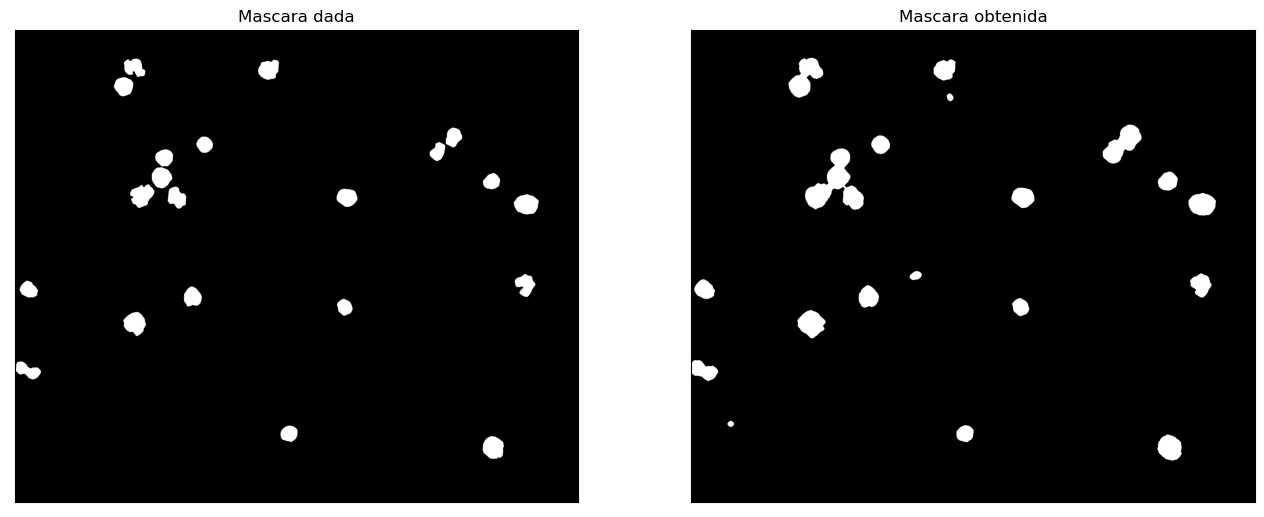

Indice de Jaccard imagen 1: 74.4809040778814%
----------------IMAGEN2-------------


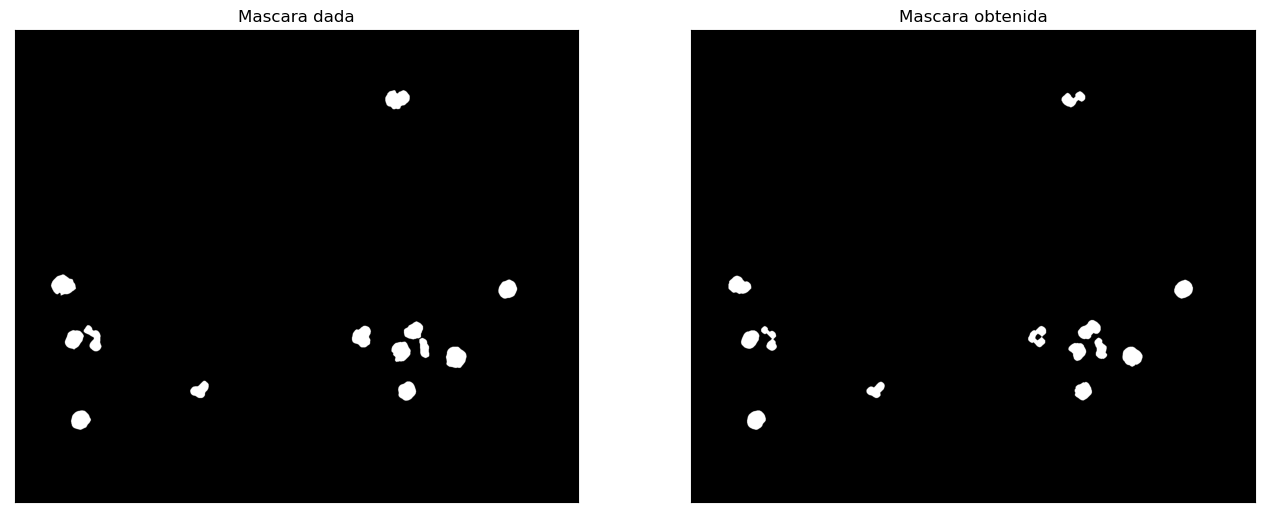

Indice de Jaccard imagen 2: 81.25453226976069%
----------------IMAGEN3-------------


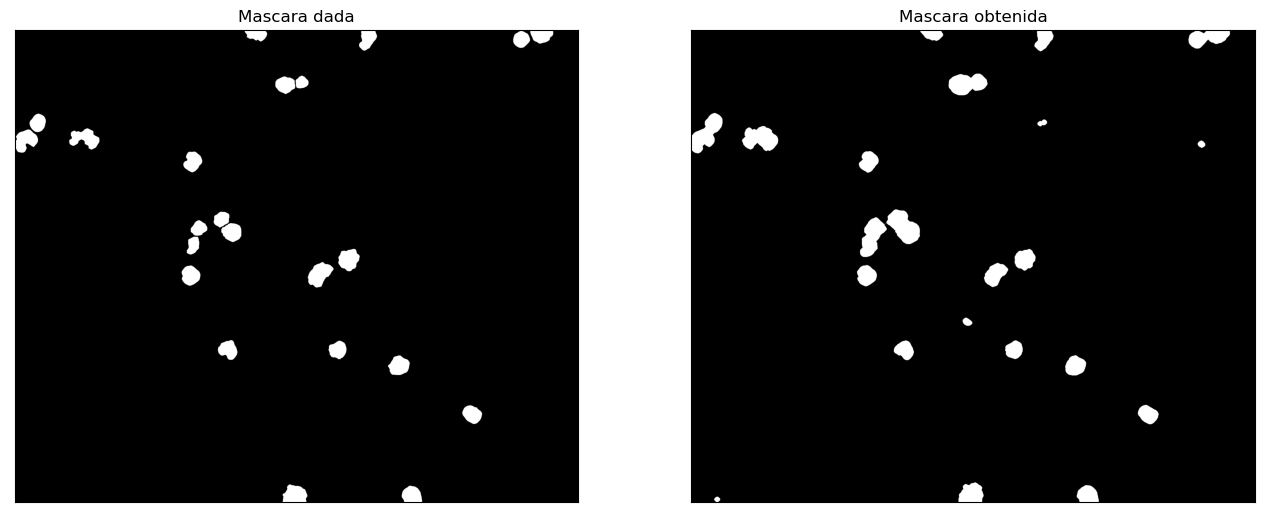

Indice de Jaccard imagen 3: 78.83109211577887%


In [33]:
_, mask31 = cv2.threshold(mask31, 0, 1, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
_, mask32 = cv2.threshold(mask32, 0, 1, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
_, mask33 = cv2.threshold(mask33, 0, 1, cv2.THRESH_BINARY + cv2.THRESH_OTSU)


print("----------------IMAGEN1-------------")
plt.figure(figsize=(16,8))
plt.subplot(121)
plt.imshow(mask1,  cmap = 'gray')
plt.title('Mascara dada')
plt.xticks([]), plt.yticks([])

plt.subplot(122)
plt.imshow(mask31, cmap='gray')
plt.title('Mascara obtenida')
plt.xticks([]), plt.yticks([])
plt.show()

J21 = jaccard_score(mask1,mask31, average="micro")
print(f'Indice de Jaccard imagen 1: {J21*100}%')

print("----------------IMAGEN2-------------")
plt.figure(figsize=(16,8))
plt.subplot(121)
plt.imshow(mask2,  cmap = 'gray')
plt.title('Mascara dada')
plt.xticks([]), plt.yticks([])

plt.subplot(122)
plt.imshow(mask32, cmap='gray')
plt.title('Mascara obtenida')
plt.xticks([]), plt.yticks([])
plt.show()

J22 = jaccard_score(mask2,mask32, average="micro")
print(f'Indice de Jaccard imagen 2: {J22*100}%')

print("----------------IMAGEN3-------------")
plt.figure(figsize=(16,8))
plt.subplot(121)
plt.imshow(mask3,  cmap = 'gray')
plt.title('Mascara dada')
plt.xticks([]), plt.yticks([])

plt.subplot(122)
plt.imshow(mask33, cmap='gray')
plt.title('Mascara obtenida')
plt.xticks([]), plt.yticks([])
plt.show()

J23 = jaccard_score(mask3,mask33, average="micro")
print(f'Indice de Jaccard imagen 3: {J23*100}%')

Para finalizar recapitulemos los resultados obtenidos para cada imagen

In [35]:
print("-----------IMAGEN1-----------\n")
print(f'numero de leucocitos con la mascara dada = {cnt21}\n')

print(f'numero de leucocitos con el algoritmo con erosión = {count1}')
print(f'Indice de Jaccard = {J1*100}%\n')

print(f'numero de leucocitos con el algoritmo sin erosión = {count21}')
print(f'Indice de Jaccard = {J21*100}%\n')

print("\n-----------IMAGEN2-----------\n")
print(f'numero de leucocitos con la mascara dada = {cnt22}\n')

print(f'numero de leucocitos con el algoritmo con erosión = {count2}')
print(f'Indice de Jaccard = {J2*100}%\n')

print(f'numero de leucocitos con el algoritmo sin erosión = {count22}')
print(f'Indice de Jaccard = {J22*100}%\n')

print("\n-----------IMAGEN3-----------\n")
print(f'numero de leucocitos con la mascara dada = {cnt23}\n')

print(f'numero de leucocitos con el algoritmo con erosión = {count3}')
print(f'Indice de Jaccard = {J3*100}%\n')

print(f'numero de leucocitos con el algoritmo sin erosión = {count23}')
print(f'Indice de Jaccard = {J23*100}%\n')

-----------IMAGEN1-----------

numero de leucocitos con la mascara dada = 22

numero de leucocitos con el algoritmo con erosión = 21
Indice de Jaccard = 51.26469540434627%

numero de leucocitos con el algoritmo sin erosión = 19
Indice de Jaccard = 74.4809040778814%


-----------IMAGEN2-----------

numero de leucocitos con la mascara dada = 15

numero de leucocitos con el algoritmo con erosión = 5
Indice de Jaccard = 12.290277839917676%

numero de leucocitos con el algoritmo sin erosión = 13
Indice de Jaccard = 81.25453226976069%


-----------IMAGEN3-----------

numero de leucocitos con la mascara dada = 35

numero de leucocitos con el algoritmo con erosión = 21
Indice de Jaccard = 41.15464632454924%

numero de leucocitos con el algoritmo sin erosión = 21
Indice de Jaccard = 78.83109211577887%

